In [6]:
%load_ext autoreload
%autoreload 2

import os
import sys
import re
import json

from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_path = os.getcwd().replace('/notebooks', '')
print(f'Adding {new_path} to sys.path')

if new_path not in sys.path:
    sys.path.append(new_path)

# Local imports
from curvemetrics.src.classes.datahandler import DataHandler
from curvemetrics.src.classes.datafetcher import DataFetcher
from curvemetrics.src.classes.metricsprocessor import MetricsProcessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Adding /root/curve-lp-metrics to sys.path


In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 10})

In [4]:
datahandler = DataHandler()
token_metadata = datahandler.get_token_metadata()
pool_metadata = datahandler.get_pool_metadata()
datafetcher = DataFetcher(token_metadata=datahandler.token_metadata)
token = '0x6b175474e89094c44da98b954eedeac495271d0f'

In [7]:
def load_config():
    # Load the configuration
    s = os.path.join(os.path.abspath('config.json'))
    s = re.sub(r'(/root/curve-lp-metrics/).*', r'\1', s) + 'config.json'
    with open(s, "r") as config_file:
        config = json.load(config_file)
    return config

config = load_config()

In [14]:
token_start = int(datetime.timestamp(datetime(2023, 6, 1)))
token_end = int(datetime.timestamp(datetime.now()))

In [22]:
token_config = config['token_exchange_map'][token_metadata[token]['symbol']]
_, source = token_config
token_data = datafetcher.get_ohlcv(token_start, token_end, token, default_exchange=source)

Using Binance US for DAI/USD.


<Axes: xlabel='timestamp'>

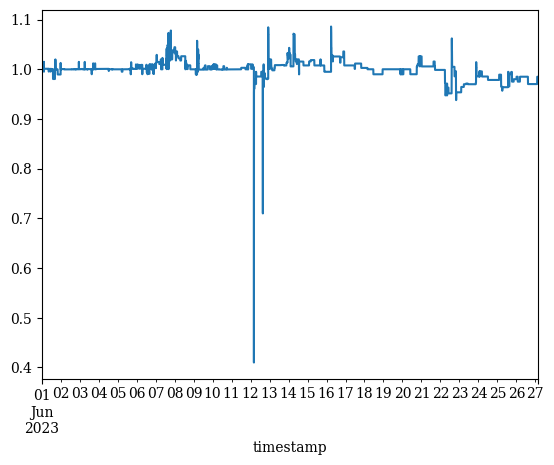

In [23]:
df = datahandler.format_token_data(token_data)
df.index = pd.to_datetime(df.timestamp, unit='s')
df['close'].plot()

In [25]:
source = "0xaed0c38402a5d19df6e4c03f4e2dced6e29c1ee9"
token_data = datafetcher.get_chainlink_prices(token, source, token_start, token_end)

Found the closest round: 110680464442257311033, at 2023-05-31 23:53:11.
Number of iterations: 12


<Axes: xlabel='timestamp'>

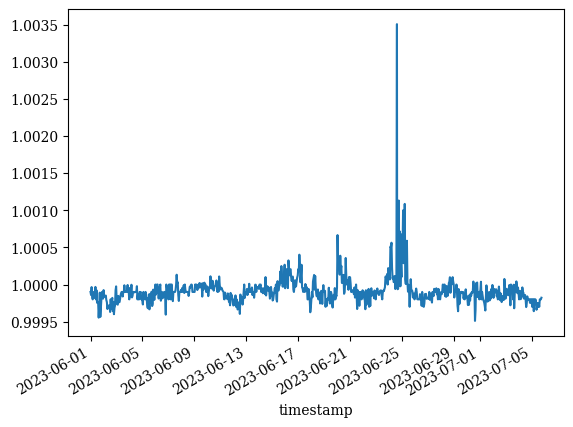

In [26]:
df = datahandler.format_token_data(token_data)
df.index = pd.to_datetime(df.timestamp, unit='s')
df['close'].plot()

<Axes: >

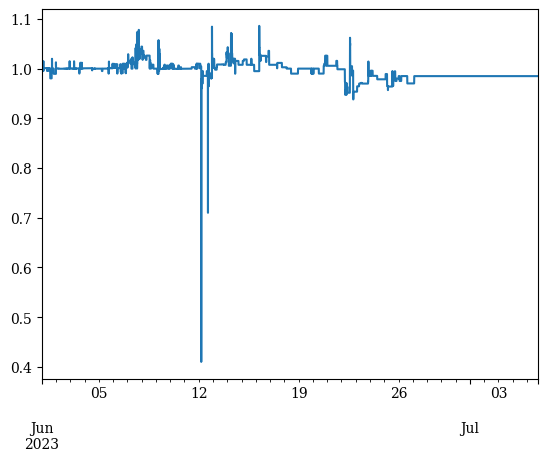

In [28]:
in_db_data = datahandler.get_ohlcv_data(token, token_start, token_end)
in_db_data['close'].plot()

In [31]:
token_data

[['0x6b175474e89094c44da98b954eedeac495271d0f',
  'DAI/USD',
  1685577191000,
  None,
  None,
  None,
  0.9999,
  None],
 ['0x6b175474e89094c44da98b954eedeac495271d0f',
  'DAI/USD',
  1685580827000,
  None,
  None,
  None,
  0.99985847,
  None],
 ['0x6b175474e89094c44da98b954eedeac495271d0f',
  'DAI/USD',
  1685584451000,
  None,
  None,
  None,
  0.99996559,
  None],
 ['0x6b175474e89094c44da98b954eedeac495271d0f',
  'DAI/USD',
  1685588087000,
  None,
  None,
  None,
  0.99983502,
  None],
 ['0x6b175474e89094c44da98b954eedeac495271d0f',
  'DAI/USD',
  1685591723000,
  None,
  None,
  None,
  0.9998,
  None],
 ['0x6b175474e89094c44da98b954eedeac495271d0f',
  'DAI/USD',
  1685595347000,
  None,
  None,
  None,
  0.99986221,
  None],
 ['0x6b175474e89094c44da98b954eedeac495271d0f',
  'DAI/USD',
  1685598959000,
  None,
  None,
  None,
  0.9999,
  None],
 ['0x6b175474e89094c44da98b954eedeac495271d0f',
  'DAI/USD',
  1685602583000,
  None,
  None,
  None,
  0.99982,
  None],
 ['0x6b175474e8

In [29]:
datahandler.insert_token_data(token_data)